In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

El algoritmo K-means es un método de agrupamiento utilizado en la minería de datos y el machine learning para dividir un conjunto de datos en k grupos o clusters. Los datos se agrupan de tal manera que los puntos en el mismo clúster sean más similares entre sí que los puntos en otros clusters.

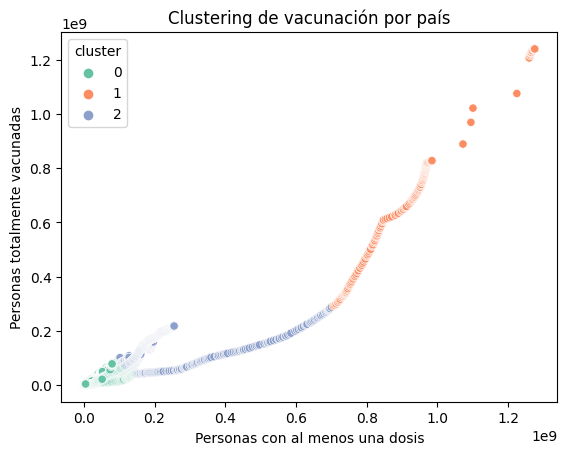

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
df = pd.read_csv('/kaggle/input/covid-world-vaccination-progress/country_vaccinations.csv')

# Seleccionar variables numéricas relevantes
df_kmeans = df[['total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']].dropna()

# Escalar los datos (muy importante para K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_kmeans)

# Elegir número de grupos
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

# Visualización: solo para las 2 primeras variables (como ejemplo)
sns.scatterplot(
    x=df_kmeans['people_vaccinated'],
    y=df_kmeans['people_fully_vaccinated'],
    hue=df_kmeans['cluster'],
    palette='Set2'
)
plt.title("Clustering de vacunación por país")
plt.xlabel("Personas con al menos una dosis")
plt.ylabel("Personas totalmente vacunadas")
plt.show()
